## Conditional Filter


본 챕터에서는 RoI 추출 방법 중 하나인 Conditional Filter에 대하여 다루고 있습니다. 

x,y,z값을 GT, GE, LT, LE, EQ.조건에 맞추어 제거 할수 있습니다. 

자세한 내용은 [Removing outliers using a Conditional or RadiusOutlier removal](http://pointclouds.org/documentation/tutorials/remove_outliers.php)를 참고 하시면 됩니다.

> PCL에서는 Conditional Filter를 Noise제거용으로 소개 하고 있지만, RoI추출에 좀더 유용한것 같아 RoI 추출 기법으로 분류 하였습니다. 

In [21]:
%load_ext watermark
%watermark -d -v -p pcl,numpy

2018-11-23 

CPython 3.5.2
IPython 6.4.0

pcl unknown
numpy 1.14.5


In [50]:
# -*- coding: utf-8 -*-
from __future__ import print_function
import pcl
import numpy as np
np.warnings.filterwarnings('ignore') #경고 메시지 출력 안함 

import os
os.chdir("/workspace/3D_People_Detection_Tracking") 

In [51]:
from include.visualization_helper import *
%matplotlib inline

## do_conditional_outlier_filtering 정의

입력 
- pcl_data : point cloud
- filter_axis : 제거할 축 (x or y or z)
- axis_min : 최소 크기
- axis_max : 최대 크기

출력  
- point cloud

In [52]:
def do_conditional_outlier_filtering(pcl_data, axis,gt, lt):
    '''
    :param pcl_data: point could data subscriber
    :axis : 
    :gt :
    :lt :
    :return: point cloud data
    eg) do_conditional_outlier_filtering(cloud, 'x',1.0,20.0)
    : https://github.com/hunjung-lim/3D_People_Detection_Tracking
    '''
    #axis_str = axis.str()
    range_cond = pcl_data.make_ConditionAnd()
    range_cond.add_Comparison2(axis, pcl.CythonCompareOp_Type.GT, gt)
    range_cond.add_Comparison2(axis, pcl.CythonCompareOp_Type.LT, lt)

    # build the filter
    condrem = pcl_data.make_ConditionalRemoval(range_cond)
    condrem.set_KeepOrganized(True)
    
    return condrem.filter ()

## PCD 파일 읽기

In [55]:
cloud = pcl.load("./sample/lobby.pcd") # Deprecated; use pcl.load instead.

Number of Points : 19329
(x) : 92.2m
(y) : 87.5m
(z) : 10.3m


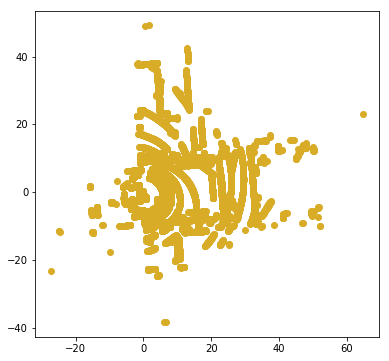

In [56]:
print("Number of Points : {}".format(cloud.size))
if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())    

## do_conditional_outlier_filtering 수행

In [57]:
axis = 'x'
gt = 1.0
lt = 20.0
cloud = do_conditional_outlier_filtering(cloud, axis,gt, lt)

Number of Points : 19329
(x) : nanm
(y) : nanm
(z) : nanm


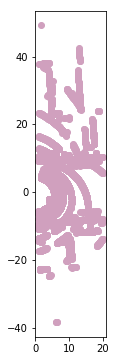

In [58]:
print("Number of Points : {}".format(cloud.size))
if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())   

In [59]:
axis = 'y'
gt = -7.0
lt = 5.5
cloud = do_conditional_outlier_filtering(cloud, axis,gt, lt)

Number of Points : 19329
(x) : nanm
(y) : nanm
(z) : nanm


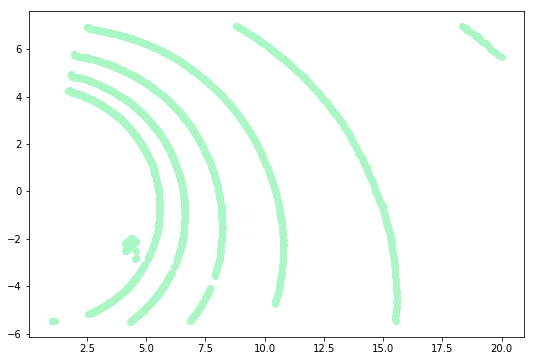

In [60]:
print("Number of Points : {}".format(cloud.size))
if (cloud.size!=0):
    visualization2D_xyz(cloud.to_array())   

Number of Points : 19329
(x) : nanm
(y) : nanm
(z) : nanm


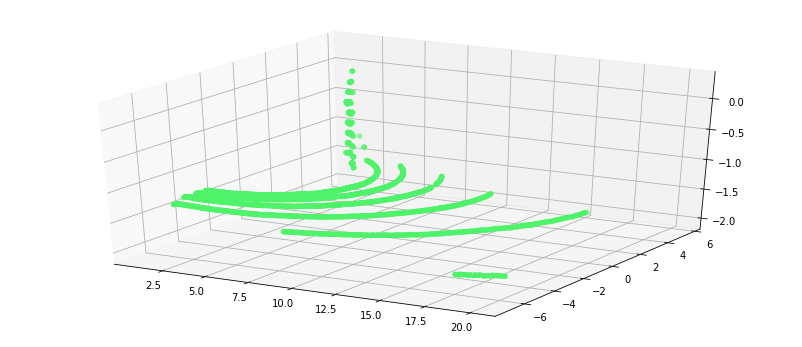

In [62]:
print("Number of Points : {}".format(cloud.size))
if (cloud.size!=0):
    visualization3D_xyz(cloud.to_array())   

In [63]:
axis = 'z'
gt = -1.2
lt = 10.0
cloud = do_conditional_outlier_filtering(cloud, axis,gt, lt)

Number of Points : 19329
(x) : nanm
(y) : nanm
(z) : nanm


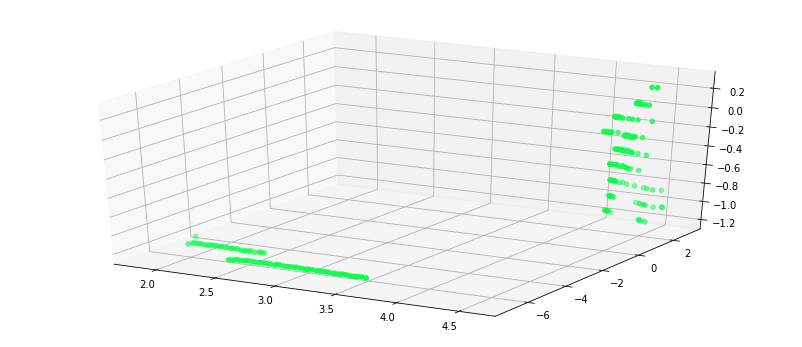

In [65]:
print("Number of Points : {}".format(cloud.size))
if (cloud.size!=0):
    visualization3D_xyz(cloud.to_array())    

> Conditional 필터의 z축 필터링을 통해서 바닥제거도 가능합니다. 
> 단, Lidar가 기울어져있으면 근거리와 원거리의 z값이 다르기 때문에 설치시 조심해야 합니다. 